# Izpit: Analitika 2: Strojno učenje v Python-u

Rok oddaje: `TODO!`

Cilj: `doseči čim boljšo končno napoved.`

Za vsa vprašanja smo na voljo.

Lahko si pomagate z uporabo gradiv in internetom. Ne pozabite na uradno dokumentacijo.

Srečno!!

## Izbirate lahko med dvema nalogama oziroma problemoma:

* Klasifikacijski --> Glede na podane karakteristike površja, klasificirajte rastje se tam nahaja
* Regresijski --> Napoved cene hiše

# Problem 1: Klasifikacijski

Podane imate podatke o _30m x 30m_ območjih divjine/narave in njihovih karakektaristikah.

Atributi:
* `NadmorskaVisina` (nadmorska višina v metrih)
* `StopinjeAzimuth` (azimut kot v stopinjah)
* `Naklon` (naklon območja v stopinjah)
* `DolzinaDoVode` (najkrajša dolžina do vode na površju v metrih)
* `VertikalnaDolzinaDoVode` (vertikalna najkrajša dolžina do vode na površju v metrih)
* `DolzinaDoZeleznice` (najkrajša dožina do železnice v metrih)
* `HillshadeIndeksOb9h` (hillshade indeks ob 9:00 --> območe vrednosti: [0,255])
* `HillshadeIndeksOb12h` (hillshade indeks ob 12:00 --> območe vrednosti: [0,255])
* `HillshadeIndeksOb15h` (hillshade indeks ob 15:00 --> območe vrednosti: [0,255])
* `DolzinaDoPozarneTocke` (najkrajša dolžina do požarno nevarne/vnetljive točke v metrih)
* `Obmocje` (indeks območja v katerem se nahaja ta predel --> območje vrednosti: [1,4])
* `TipZemlje` (indeks tipa zemlje na tem območju --> območje vrednosti: [1,40])


Ciljni atribut:
* `TipRastja` (indeks tipa rastja ki se nahaja na tem območju)

Vaša naloga je, da izdelate klasifikacijski model, ki bo čim boljše klasificiral tip rastja, ki se nahaja na nekem območju glede na podane atribute.

Za napovedovanje lahko uporabite kakršnekoli metode.

Pred samo napovedjo boste morali značilke urediti v obliko, ki bo omogočala napovedovanje tipa rastja.

```
POZOR: Pazite, da za optimizacijo modela uporabljate validacijske podatke, ki jih naredite z delitvijo train podatkov, že naloženih s spodnjo kodo. Spodnje celice ne spreminjajte, da vsi primerjamo rezultate z istimi testnimi podatki.
```

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/Problem1_tip_narave.csv",sep="\t",encoding="utf-8")
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)
# display(data)
# display(train)
# display(test)

In [49]:
from sklearn.preprocessing import StandardScaler

# Train in test podatke razdelimo na znacilke in prediktorje za nadaljnjo uporabo
y_train = train['TipRastja']
X_train = train.drop(columns=["TipRastja"])
y_test = test['TipRastja']
X_test = test.drop(columns=["TipRastja"])

# Pripravimo si skalirane podatke, ki jih uporabljamo v nadaljevanju notebooka
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data study before building model

In [50]:
# OPAZKE
# - Ni manjkajočih podatkov, kar pomeni da imputacija ne bo potrebna
# - Prav tako opazimo, da so vse značilke tipa float64 (predictor je int). To pomeni, da encoding ni potreben. 
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NadmorskaVisina          581012 non-null  float64
 1   StopinjeAzimuth          581012 non-null  float64
 2   Naklon                   581012 non-null  float64
 3   DolzinaDoVode            581012 non-null  float64
 4   VertikalnaDolzinaDoVode  581012 non-null  float64
 5   DolzinaDoZeleznice       581012 non-null  float64
 6   HillshadeIndeksOb9h      581012 non-null  float64
 7   HillshadeIndeksOb12h     581012 non-null  float64
 8   HillshadeIndeksOb15h     581012 non-null  float64
 9   DolzinaDoPozarneTocke    581012 non-null  float64
 10  Obmocje                  581012 non-null  float64
 11  TipZemlje                581012 non-null  float64
 12  TipRastja                581012 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 57.6 MB


None

In [51]:
display(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
NadmorskaVisina,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
StopinjeAzimuth,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Naklon,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
DolzinaDoVode,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
VertikalnaDolzinaDoVode,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
DolzinaDoZeleznice,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
HillshadeIndeksOb9h,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
HillshadeIndeksOb12h,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
HillshadeIndeksOb15h,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
DolzinaDoPozarneTocke,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


**Porazdelitev vrednosti v značilkah**
- Ugotovitev: v primeru uporabe nekaterih modelov (npr: logistična regresija) bi bilo smiselno normalizirati porazdelitve nekaterih značilk.

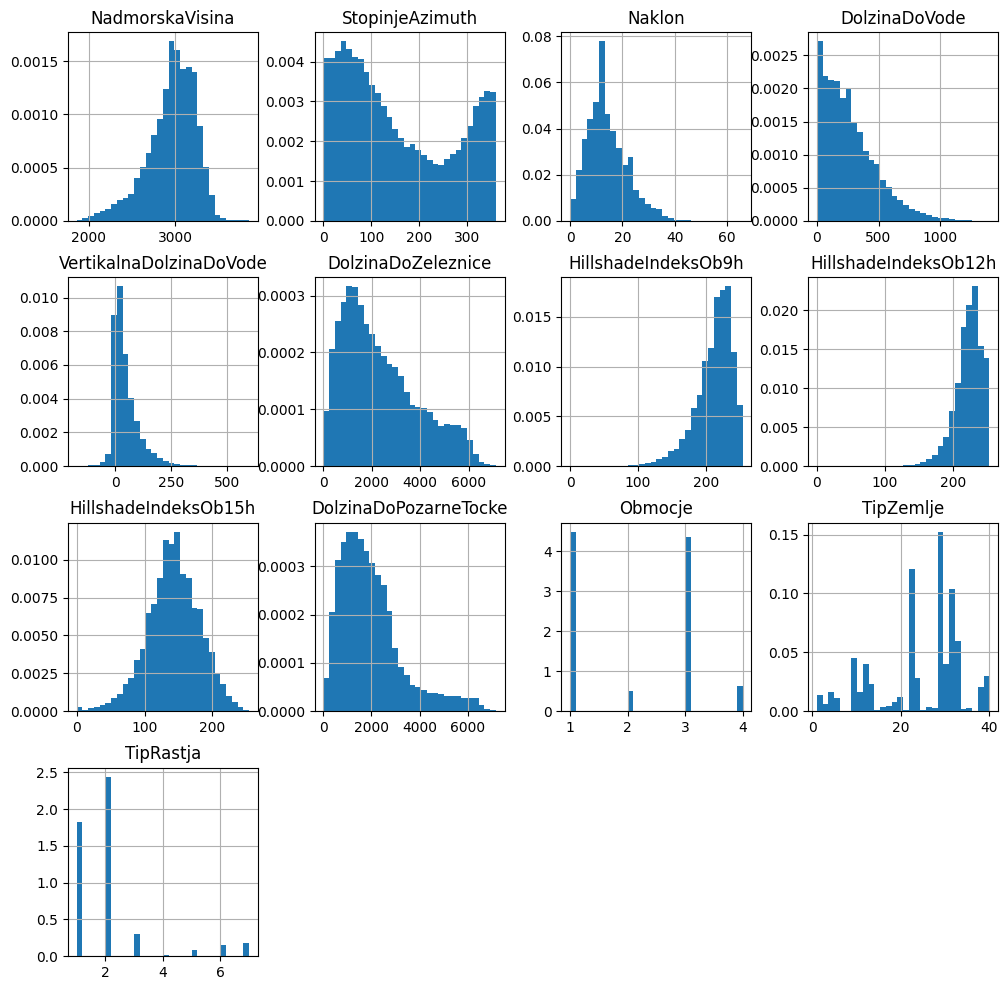

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Podobno ugotovimo z uporabo qq-plota

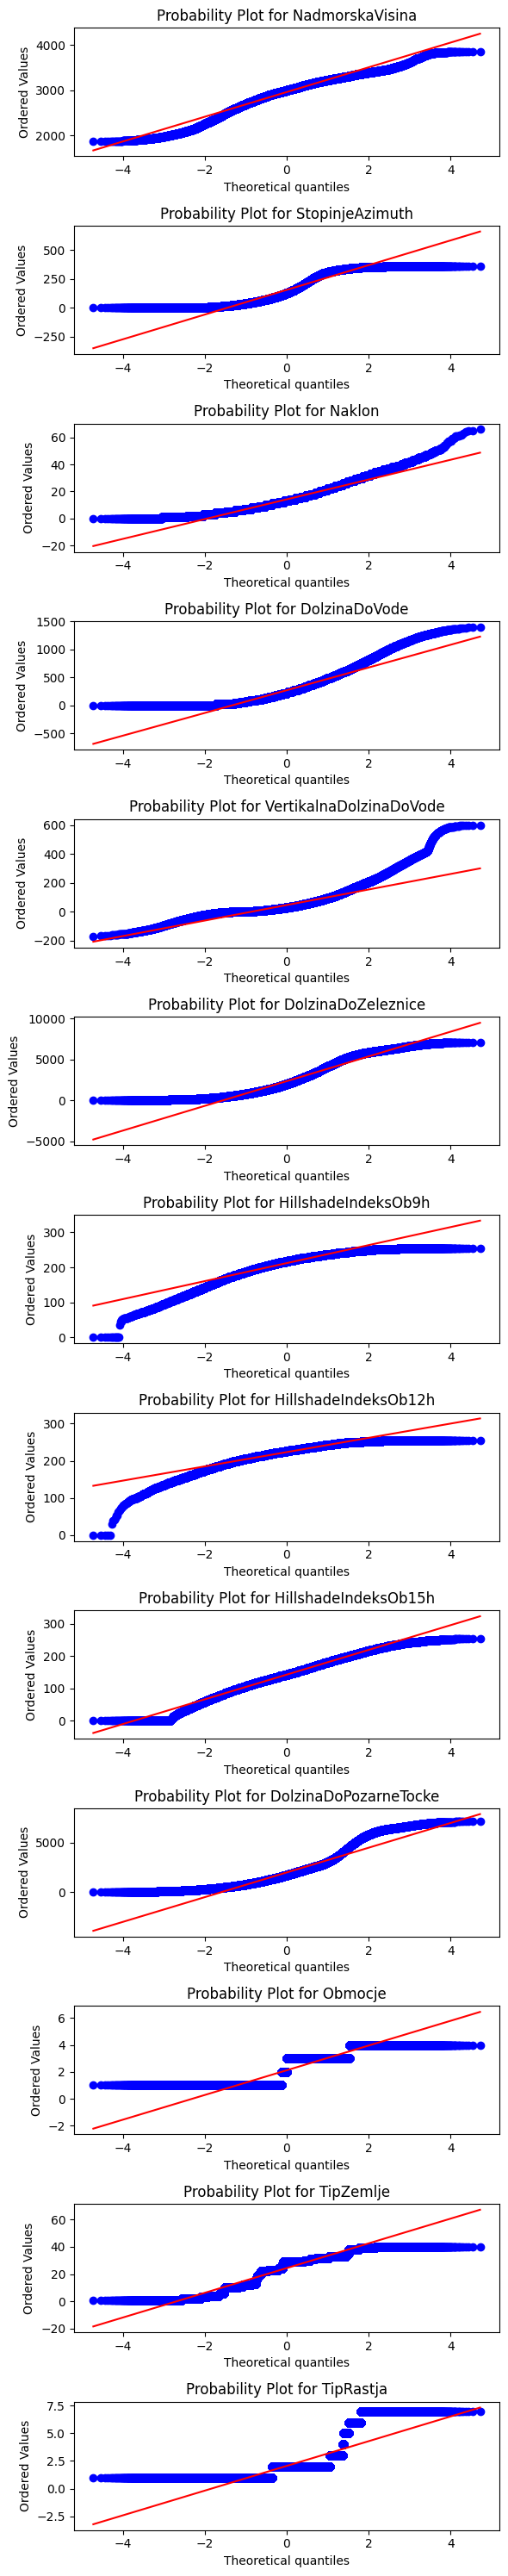

In [53]:
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(6, 30))

for i, col in enumerate(data.columns):
    ax = axes[i]
    stats.probplot(data[col], dist="norm", plot=ax)
    ax.set_title(f"Probability Plot for {col}")

plt.tight_layout()
plt.show()

- magnitude spremenljivk

In [54]:
data.max() - data.min()
# magnitude dolocenih spremenljivk se zelo razlikujejo - potrebno skaliranje

NadmorskaVisina            1999.0
StopinjeAzimuth             360.0
Naklon                       66.0
DolzinaDoVode              1397.0
VertikalnaDolzinaDoVode     774.0
DolzinaDoZeleznice         7117.0
HillshadeIndeksOb9h         254.0
HillshadeIndeksOb12h        254.0
HillshadeIndeksOb15h        254.0
DolzinaDoPozarneTocke      7173.0
Obmocje                       3.0
TipZemlje                    39.0
TipRastja                     6.0
dtype: float64

### Modeling and evaluation

##### Logistična regresija

- zaradi večjega števila sample-ov uporabimo metodo 'newton-cholesky'
    - `newton-cholesky` is a good choice for n_samples >> n_features

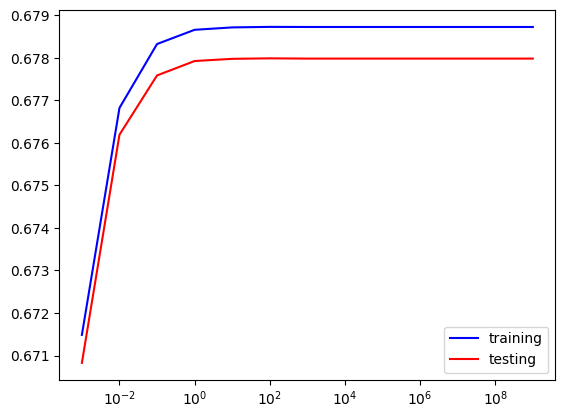

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

traning_scores = {}
testing_scores = {}

c_values = np.logspace(-3, 9, num=13)

for c in c_values:
    logreg_diff = LogisticRegression(C=c, solver='newton-cholesky',max_iter=100).fit(X_train_scaled, y_train)
    traning_scores[c] = logreg_diff.score(X_train_scaled, y_train)
    testing_scores[c] = logreg_diff.score(X_test_scaled, y_test)
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

# display(traning_scores)
# display(testing_scores)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
logreg = LogisticRegression(C=10, solver='newton-cholesky',max_iter=10000)
logreg.fit(X_train_scaled, y_train)

predictions = logreg.predict(X_test_scaled)
print(f"Training set score: {logreg.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {logreg.score(X_test_scaled, y_test):.2f}")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(confusion_matrix(y_test, predictions))

Training set score: 0.68
Test set score: 0.68
Accuracy: 0.68
[[42722 20767     1     0     0     0    66]
 [16566 67529   887     0     0    82    14]
 [    2  3420  6848     5     0   363     0]
 [    0   166   534    80     0    15     0]
 [   69  2811    61     0     0     0     0]
 [   43  3029  1905     8     0   242     0]
 [ 4943   373     0     0     0     0   753]]


Sklep: Model logistične regresije ni dovolj kompleksen, underfitta za ta primer. Za boljše rezultate bi bilo potrebno linearizirati določene značilke. V nadaljevanju raje poskusimo z drugimi klasifikacijskimi metodami.

##### KNeighbour, Decision Tree and Random Forest

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_score(*, model, X_train, X_test, y_train, y_test):
    predictions = model.predict(X_test)
    print(f"------------- {type(model).__name__} -------------")
    print(f"Training set score: {model.score(X_train, y_train):.2f}")
    print(f"Test set score: {model.score(X_test, y_test):.2f}")
    print('Accuracy: ', accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))


In [58]:

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_scaled, y_train)
get_score(model=knn, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test)


------------- KNeighborsClassifier -------------
Training set score: 0.95
Test set score: 0.92
Accuracy:  0.9190896364971544
[[58263  4893     0     0    54    19   327]
 [ 4209 79932   284     5   358   241    49]
 [   10   353  9580    82    21   592     0]
 [    0     2   189   554     0    50     0]
 [  107   603    53     0  2160    18     0]
 [   27   371   717    41    17  4054     0]
 [  351    59     0     0     1     0  5658]]


In [59]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
get_score(model=tree, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

------------- DecisionTreeClassifier -------------
Training set score: 1.00
Test set score: 0.93
Accuracy:  0.9327037818982926
[[59246  3917     6     0    66    16   305]
 [ 3902 80209   237     1   463   205    61]
 [    4   240  9832   117    39   406     0]
 [    0     3   114   636     0    42     0]
 [   67   445    44     0  2362    22     1]
 [   12   199   409    32    13  4562     0]
 [  297    43     0     0     2     0  5727]]


In [60]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
get_score(model=forest, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

------------- RandomForestClassifier -------------
Training set score: 1.00
Test set score: 0.96
Accuracy:  0.9604656232788691
[[60515  2899     1     0    17     4   120]
 [ 1742 82953   131     2   128    90    32]
 [    3   132 10305    28    10   160     0]
 [    0     0    86   688     0    21     0]
 [   30   511    40     0  2343    17     0]
 [    7   122   278    24     4  4792     0]
 [  220    31     0     0     1     0  5817]]


##### XGBoost with cross-validation

In [61]:
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import numpy as np

params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 7}

y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

# Create classification matrices
dtrain_clf = xgb.DMatrix(X_train, y_train_encoded, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test_encoded, enable_categorical=True)

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=100,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
   early_stopping_rounds=20
)

print(f"Accuracy:{results['test-auc-mean'].max()}")


Accuracy:0.9663386199728464
